In [44]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mano
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [45]:
#import basic modules
import pandas as pd 
import numpy as np
import seaborn as sb
import math
import warnings
import matplotlib.pyplot as plt        
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn import preprocessing

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score

# import scaling
from sklearn.preprocessing import StandardScaler


In [46]:
df = ''

In [47]:
## F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

def loaddata():
    global df
    data = input("Enter the path of your file:")
    df = pd.read_csv(data)
    df.head()
    df.tail()
    return df
    # print(df)

In [48]:
loaddata()

Enter the path of your file:bankruptcy.csv


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [49]:
#F2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)

def f2(df):
  return df.shape, df.columns, df.dtypes, df.describe

#using describe to summarise the dataset. With the result we canexamine the range of numerical values, 
#to see if there are any far outside of our expected range. 

In [50]:
f2(df)

((6819, 96),
 Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
        ' ROA(A) before interest and % after tax',
        ' ROA(B) before interest and depreciation after tax',
        ' Operating Gross Margin', ' Realized Sales Gross Margin',
        ' Operating Profit Rate', ' Pre-tax net Interest Rate',
        ' After-tax net Interest Rate',
        ' Non-industry income and expenditure/revenue',
        ' Continuous interest rate (after tax)', ' Operating Expense Rate',
        ' Research and development expense rate', ' Cash flow rate',
        ' Interest-bearing debt interest rate', ' Tax rate (A)',
        ' Net Value Per Share (B)', ' Net Value Per Share (A)',
        ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
        ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
        ' Operating Profit Per Share (Yuan ¥)',
        ' Per Share Net profit before tax (Yuan ¥)',
        ' Realized Sales Gross Profit Growth Rat

In [51]:
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [52]:
df.isnull().sum().sum()

0

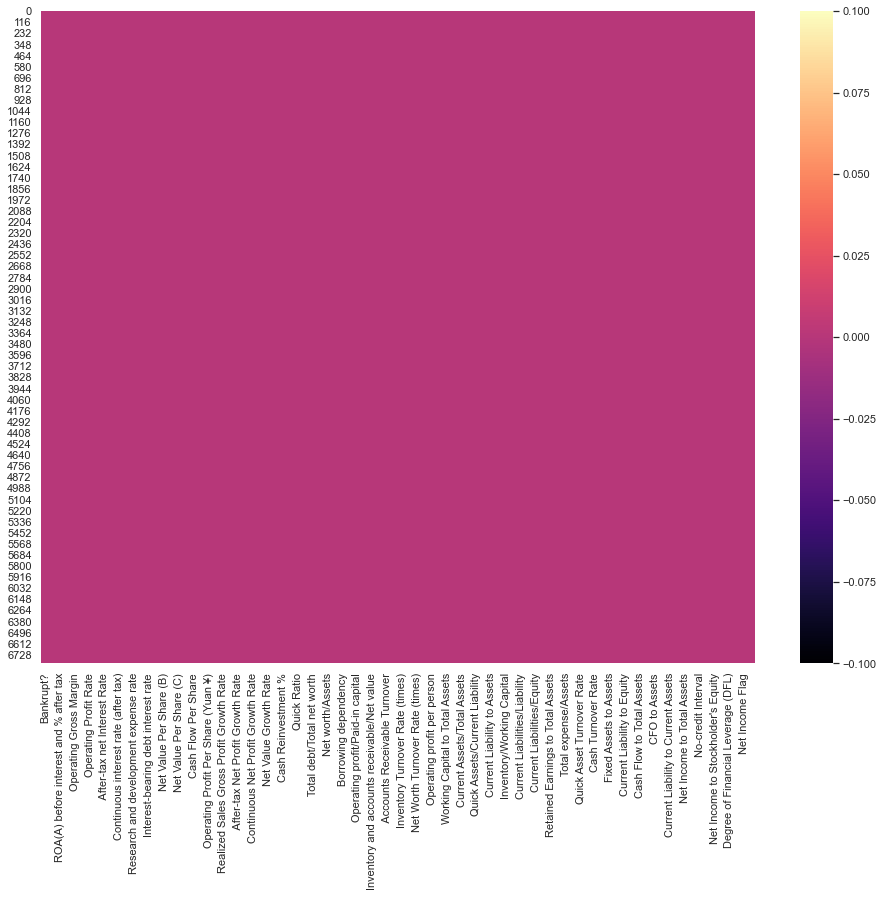

In [53]:
#Check for Missing Values
plt.figure(figsize=(16,12))
sns.heatmap(df.isnull(), cmap = 'magma')

The dataset is composed of a combination of 6819 observations per each of our 96 features.
All of the features are numerical (int64 or float64)
There are no missing values (Nan) among the data - With 6819 values in 96 columns, we have 0 null points of data, 95 Columns of full information. There are no null values that we have to treat 

In [54]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [55]:
# checking for duplicates in the data 


df.duplicated().sum()



0

there are no duplicates hence no redundancy . we dont have to treat any duplciates while wrangling

In [56]:
df_col = []
for i in range(len(df.columns)):
    df_col.append(str(df.columns[i]).strip())  

df.columns = df_col

above code is used to remove spaces from the begining and end of the column names

In [57]:
df['Net Income Flag'].value_counts()

1    6819
Name: Net Income Flag, dtype: int64

We will remove the column Net Income Flag since it has only single value of 1 and it is hence not adding any value 

In [58]:
df.drop(['Net Income Flag'], axis = 1, inplace = True)

Now doing the below plotting to see if the data is balanced and if not then we will have to use some balancing technique before we proceed to applying ML agorithms

In [59]:
#Check if the data is balanced
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Data is highly imbalanced with more than 90% of the rows being with 0 value "not bankrupt"

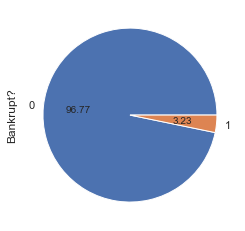

In [60]:
df['Bankrupt?'].value_counts().plot.pie(autopct="%.2f")

{0: 6599, 1: 220}


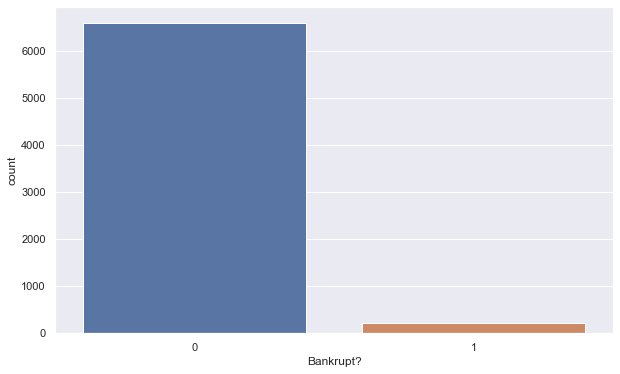

In [61]:
sns.set(rc={'figure.figsize':(10, 6)})
print(df['Bankrupt?'].value_counts().to_dict())
sns.countplot(df['Bankrupt?'])

Check if there is perfect correlation between any of the columns. If the correlation is more than 0.95 or less than -0.95 then we would remove one of the columns to avoid multicollinearity in the data-set

In [62]:
corr_mat = df.corr()

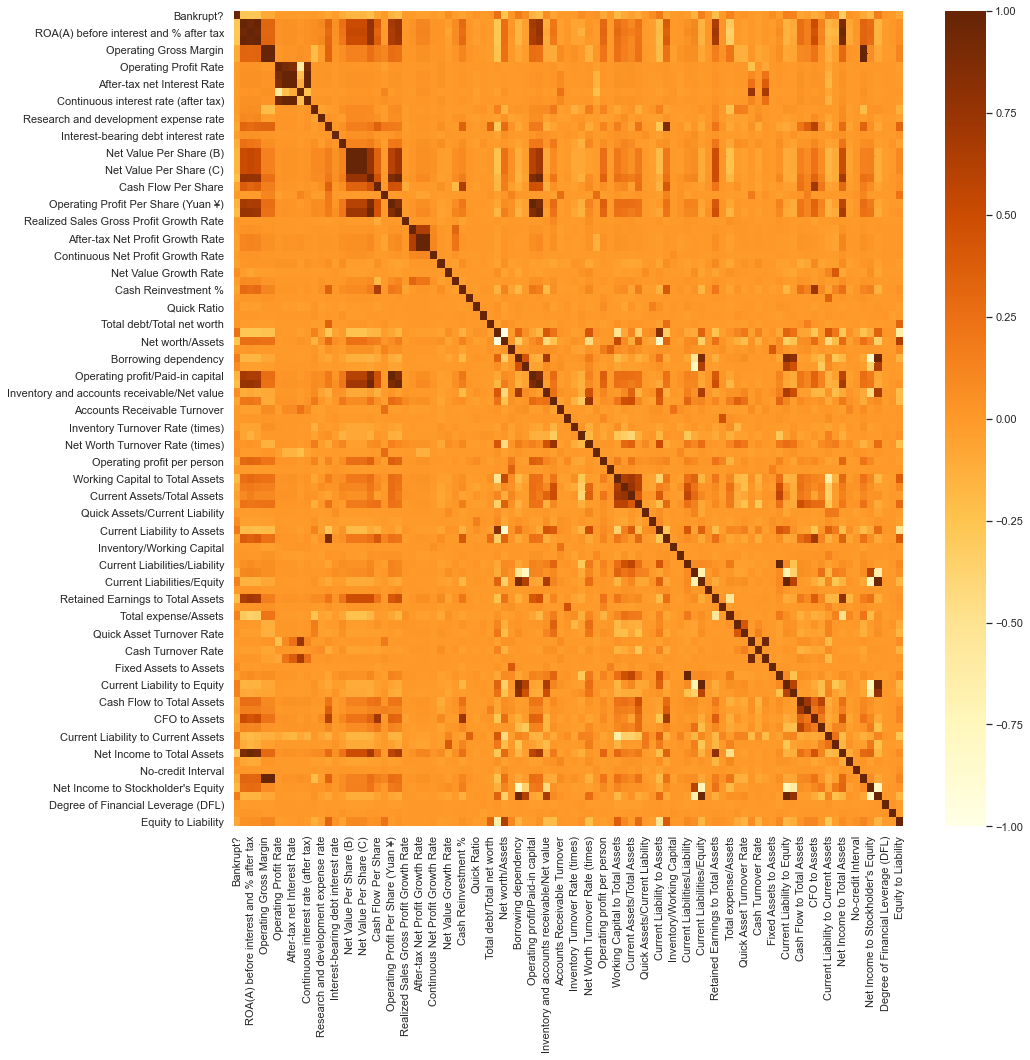

In [63]:
corr = df.corr()
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(corr, cmap="YlOrBr")

In [64]:
corr_mat = corr_mat.iloc[1:,1:]

In [65]:
drop_list = []
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if(corr_mat.iloc[i,j] >= 0.95 or corr_mat.iloc[i,j] <= -0.95):
            if corr_mat.columns[j] not in drop_list:
                drop_list.append(corr_mat.columns[j])  

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results. In my code i am dropping the columns that have correlationfactor of more than 0.95 or less then -0.95

In [66]:
len(drop_list)

17

In [67]:
df = df.drop(drop_list, axis = 1)

In [68]:
len(df.columns)

78

#Train Test Split: splitting manually
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)

In [69]:
#Data Preparation
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [70]:
#Importing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [71]:
!pip install imblearn

In [72]:
!pip install imbalanced-learn

In [73]:
!pip install delayed

In [74]:
#from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
#from matplotlib import pyplot


In [37]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 101, stratify = y_sm)

In [76]:
#Data Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)

In [41]:
# Now perform PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

NameError: name 'n_components' is not defined

In [39]:
#parameter tuning

model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30,50],
            'criterion':['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['lbfgs','liblinear']
        }
    },
   'KNN': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [1,3,5,7],
            'algorithm':['auto','kd_tree']
        }
    }
}

applying cross validation (Grid Search CV) for 4 models(SVM,Random Forest, Logistic Regression & K Nearest Neighbours)

In [40]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, verbose=3, n_jobs=-1, scoring = 'recall', return_train_score=False)
    clf.fit(X_scaled, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


,model,best_score,best_params
0,svm,0.996970,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.995605,"{'criterion': 'entropy', 'n_estimators': 50}"
2,logistic_regression,0.914533,"{'C': 1, 'solver': 'lbfgs'}"
3,KNN,1.000000,"{'algorithm': 'auto', 'n_neighbors': 5}"


The above table shows the tuned parameters for each of the models that I want to apply. Based on these parameters I will implement each of the models and explore their accuracy and recall

SVM

In [41]:
model_svm = SVC(gamma='auto',C=20, kernel='rbf', probability=True )
model_svm.fit(X_train,y_train)
svm_predictions = model_svm.predict(X_test)

In [42]:
#Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,svm_predictions))

,0,1
0,1271,49
1,10,1310


In [43]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1320
           1       0.96      0.99      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



SVM has high accuracy rate of 98%. Specifically, the model is able to predict the companies which can go bankcrupt with almost 99% accuracy.

Random Forest Classifier

In [44]:
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy' )
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [45]:
#Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,1269,51
1,11,1309


In [46]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1320
           1       0.96      0.99      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



RandomForest has high accuracy rate of 98%. Specifically, the model is able to predict the companies which can go bankcrupt with almost 99% accuracy.

Logistic Regression

In [47]:
logmodel = LogisticRegression(solver='liblinear',multi_class='auto', C = 5)
logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)

In [48]:
# Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,log_predictions))

,0,1
0,1181,139
1,122,1198


In [49]:
#Printing Classification Report
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1320
           1       0.90      0.91      0.90      1320

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



LogisticRegression has accuracy rate of 90%. Specifically, the model is able to predict the companies which can go bankcrupt with almost 91% accuracy.

KNN

In [50]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm = 'auto')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [51]:
# Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,knn_pred))

,0,1
0,1197,123
1,0,1320


In [52]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1320
           1       0.91      1.00      0.96      1320

    accuracy                           0.95      2640
   macro avg       0.96      0.95      0.95      2640
weighted avg       0.96      0.95      0.95      2640



KNN has accuracy rate of 95%. Specifically, the model is able to predict the companies which can go bankcrupt with almost 100% accuracy.

ROC Curve and Area Under the Curve

In [53]:
from sklearn.metrics import roc_curve, auc

In [54]:
# ROC Logistic

y_pred_logistic = logmodel.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

In [55]:
# ROC RAndomforest

y_pred_rfc = rfc.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

In [56]:
#ROC SVM

y_pred_svm = model_svm.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

In [57]:
# ROC KNN

y_pred_knn = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

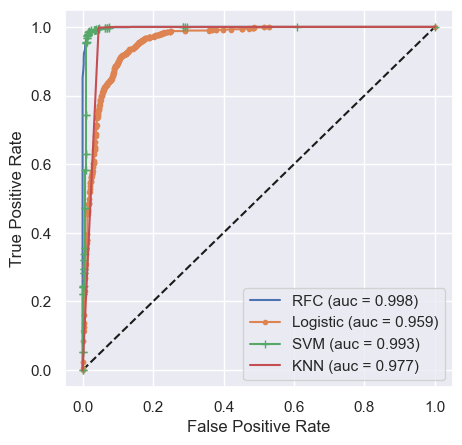

In [58]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_rfc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, marker='+', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

Conclusion

All the models have a high accuracy of mroe than 95% but out of all the 4 , RandomForest and SVM have the highest performance.  Hence we can rely on the outcome of the 2 models for making decision

XGBOOST

In [1]:
!pip install xgboost

In [2]:
#Importing Packages
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [42]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)
    
    return gsearch.best_params_

In [43]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [ ]:
Decision Tree

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

ADABOOST

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y)

Random Forest Classifier for Imbalanced Classes (did not run SMOTE at the top)

In [78]:
clf = RandomForestClassifier(max_depth=75, 
                             random_state=42, 
                             n_estimators=10, 
                             class_weight='balanced_subsample')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [79]:
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.9818181818181818
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.98      0.99      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



In [80]:
confusion_matrix(y_test, y_pred)

array([[1287,   33],
       [  15, 1305]], dtype=int64)

In [59]:


def GadientBoosting(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def AdaBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)


def DecisionTree(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)


def NaiveBayes(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GaussianNB()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def MultiLayerPerceptron(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = MLPClassifier(hidden_layer_sizes=5)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def LightGbm(trainX, testX, trainY, testY, verbose=True, clf=None):
    d_train = lgb.Dataset(trainX, label=trainY)
    params = {}
    params['learning_rate'] = 0.003
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'binary'
    params['metric'] = 'binary_logloss'
    params['sub_feature'] = 0.5
    params['num_leaves'] = 10
    params['min_data'] = 50
    params['max_depth'] = 10
    clf = lgb.train(params, d_train, 100)
    return validationmetrics(clf,testX,testY,verbose=verbose)


In [66]:
def GadientBoosting(X_train, X_test, y_train, y_test, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier()
    clf.fit(X_train , y_train)
    return validationmetrics(clf,testX,testY,verbose=verbose)

In [67]:
GadientBoosting(X_train, X_test, y_train, y_test, verbose=True, clf=None)

NameError: name 'validationmetrics' is not defined

In [ ]:
model_params = {
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }
}